In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Please edit the following PATH variable, according to your installation.
PATH='/Users/kiseon/MoCafe/fbm3d'

import sys
sys.path.append(PATH)
from fbm_lib import *

### fbm3d

- **LogNormalRandomField** creates a 3D density field with a log-normal distribution and a power-law-type power spectral density using the following algorithm:
- method = 2: the algorithm of [Lewis & Austin (2002)](https://ams.confex.com/ams/11AR11CP/webprogram/Paper42772.html).  The current implementation differs from theirs but retains the core idea.  

The code will be updated without notice. (2025.12.12)

In [2]:
nx = 256
ny, nz = nx, nx

seed = None
#seed = 4070726807
#seed = 2436634031

# Lognormal distribution is generated using method = 2 (Lewis & Austin 2002).
# If seed is set to None or not specified, a random seed will be generated arbitrarily.
# The internally used seed will be saved as "a.seed".
# Note that mean = mean value of log(density), and sigma = standard deviation of log(density).
#     They are not the mean or the STD of density.

mean = 0.0
sigma = 1.0
a = LogNormalRandomField(nx=nx,ny=ny,nz=nz,seed=seed,mean=mean,sigma=sigma,verbose=True)

print('<<== seed ==>> ', a.seed)
print(a.sigma, a.slope)

iteration =   1 / convergence = 71.91 %
iteration =   2 / convergence = 87.97 %
iteration =   3 / convergence = 95.17 %
iteration =   4 / convergence = 98.34 %
iteration =   5 / convergence = 99.62 %
<<== seed ==>>  3368129043
1.0 3.6666666666666665


Text(0, 0.5, '$P(\\ln\\rho)$')

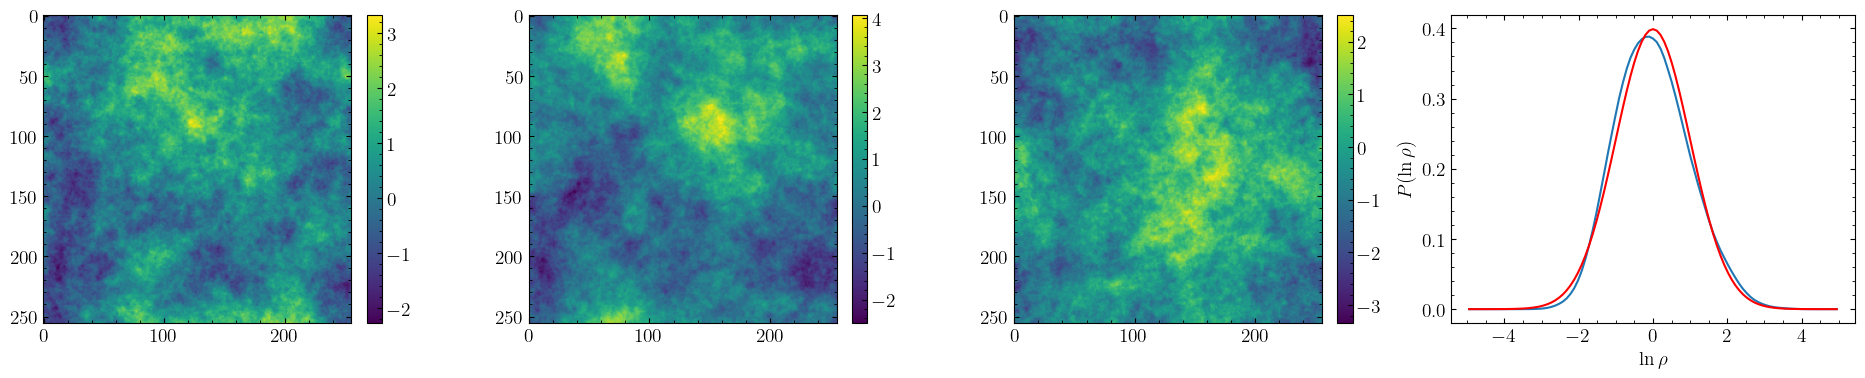

In [3]:
fig, ax = plt.subplots(1,4, figsize=(24,4))
ln_data = np.log(a.data)
im0 = ax[0].imshow(ln_data[:,:,nz//2])
im1 = ax[1].imshow(ln_data[:,ny//2,:])
im2 = ax[2].imshow(ln_data[nx//2,:,:])

add_colorbar(im0)
add_colorbar(im1)
add_colorbar(im2)

bins = np.linspace(-5.0*sigma, 5.0*sigma, 100) + mean
x    = (bins[:-1]+bins[1:])/2.0
h,_  = np.histogram(ln_data, bins, density=True)
y    = 1./np.sqrt(2.*np.pi*sigma**2) * np.exp(-(x-mean)**2/(2*sigma**2))
ax[3].plot(x,h)
ax[3].plot(x,y,color='red')
ax[3].set_xlabel(r'$\ln\rho$')
ax[3].set_ylabel(r'$P(\ln\rho)$')

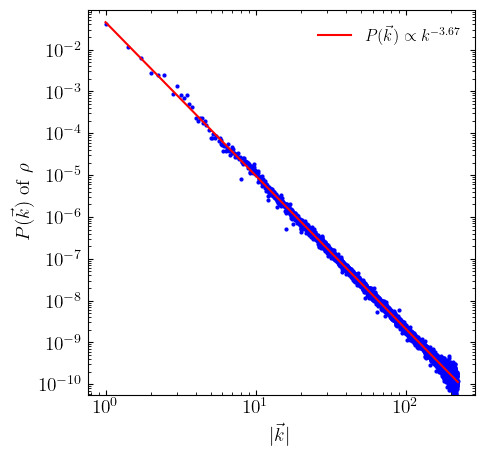

In [4]:
# Plot the power spectral densities.

kr_a, PSD_a = calculate_PSD(a.data)

ynorm = calculate_PSD_norm(a.data.shape, a.slope)
y = kr_a**(-a.slope)*ynorm
y[0] = 0.0

fig, ax = plt.subplots(1,1, figsize=(5,5))
lab = r'$P(\vec{k}) \propto k^{-%.2f}$' % (a.slope)

ax.plot(kr_a[1:], y[1:], color='red', label=lab)
ax.scatter(kr_a[1:], PSD_a[1:],s=4.0, color='blue')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$|\vec{k}|$')
ax.set_ylabel(r'$P(\vec{k})$ of $\rho$')
ax.set_ylim(np.amin(y[1:])*0.5, np.amax(y[1:])*2)
ax.legend(frameon=False)

In [5]:
# Write a fits file
# Later, a function to save a HDF5 file will be added.

a.writeto('lognormal_%03d.fits.gz' % (a.data.shape[0]))